Notebook 2: Where we illustrate overfitting and how to control for it
---------------------------------------------------------------------------------------------------
We generate data from a "mystery polynomial" and we add some noise. Given the data, our goal is to obtain the best approximation to the data, not only the ones we train on but also fresh test data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from IPython.core.display import Math

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

LOW_X = 0
HIGH_X = 5

np.random.seed(123)


def mystery_function(x):
    return x**3 - 7 * x**2 + 10 * x


def generate_data(num_data=20, noise=1.0):
    x_data = np.random.uniform(LOW_X, HIGH_X, num_data)
    y_data = mystery_function(x_data) + noise * np.random.randn(num_data)
    return x_data, y_data


x, y = generate_data()
x_plot = np.linspace(LOW_X, HIGH_X, 100)
y_plot = mystery_function(x_plot)

Plotting sampled data (points) and the mystery polynomial (dashed)

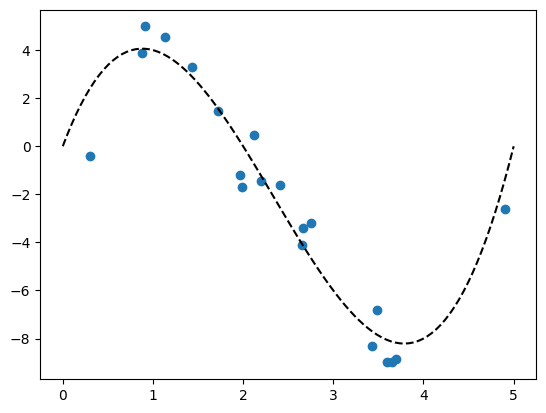

In [2]:
fig, ax = plt.subplots(1)
ax.scatter(x, y)
_ = ax.plot(x_plot, y_plot, "--k")

We iteratively fit polynomials of increasing degrees from 1 to 13

In [3]:
def print_polynomial(coefs):
    """print polynomial from coefficients"""
    output = f"{coefs[0]:.2f}" + "".join(
        f"{coefs[i]:+.2f}x^{{{i:d}}}" for i in range(1, len(coefs))
    )
    display(Math(output))


models: list[LinearRegression] = []
train_error = []
degrees = np.arange(14)
for degree in degrees:
    poly = PolynomialFeatures(degree)
    X = poly.fit_transform(x[:, np.newaxis])
    model = LinearRegression(fit_intercept=False).fit(X, y)
    print_polynomial(model.coef_)
    train_error.append(mean_squared_error(y, model.predict(X)))
    models.append(model)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

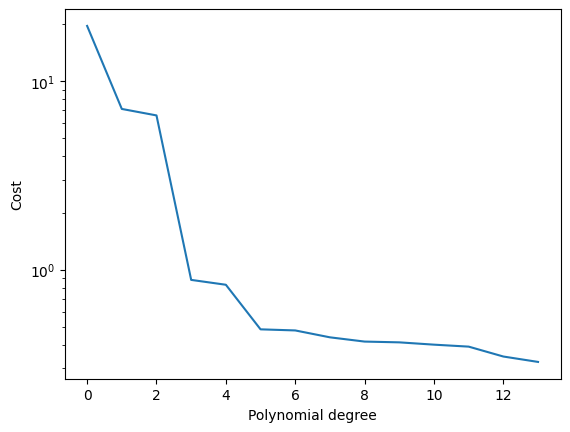

In [4]:
ax = plt.subplot()
ax.plot(degrees, train_error)
_ = ax.set(xlabel="Polynomial degree", ylabel="Cost", yscale="log")

Which degree fits the data the best?

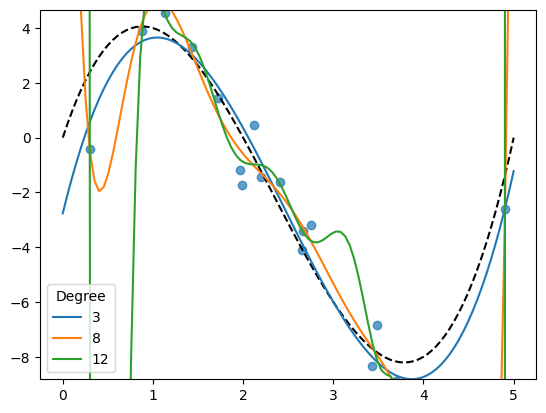

In [5]:
y_plots = []
for degree, model in zip(degrees, models):
    X_plot = PolynomialFeatures(degree).fit_transform(x_plot[:, np.newaxis])
    y_plots.append(model.predict(X_plot))

ax = plt.subplot()
ax.plot(x_plot, y_plot, "k--")
ax.scatter(x, y, alpha=0.7)
ax.autoscale(False)
for degree in [3, 8, 12]:
    ax.plot(x_plot, y_plots[degree], label=f"{degree}")
_ = ax.legend(loc="lower left", title="Degree")

Let's see how they perform in a new sampling (with noise) of the mystery polynomial.

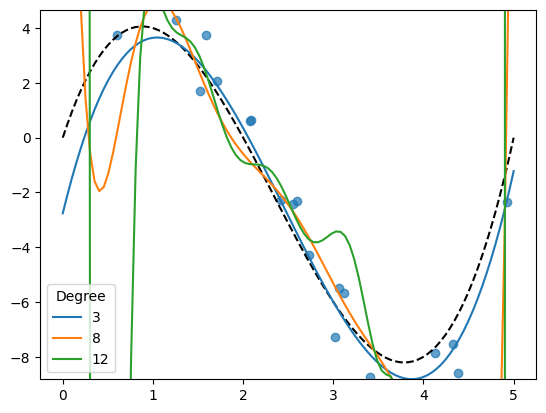

In [6]:
x_val, y_val = generate_data()
ax3 = plt.subplot()
ax3.plot(x_plot, y_plot, "k--")
ax3.scatter(x_val, y_val, alpha=0.7)
ax3.autoscale(False)
for degree in [3, 8, 12]:
    ax3.plot(x_plot, y_plots[degree], label=f"{degree}")
ax3.legend(loc="lower left", title="Degree")

Polynomial of degree 12 is cowshit.

How can we select the complexity of the model without knowing the original function? 
By validating each polynomial on this second set of data points! We call this dataset "validation dataset".

In [7]:
val_error = []
for degree, model in zip(degrees, models):
    X_val = PolynomialFeatures(degree).fit_transform(x_val[:, np.newaxis])
    val_error.append(mean_squared_error(y_val, model.predict(X_val)))

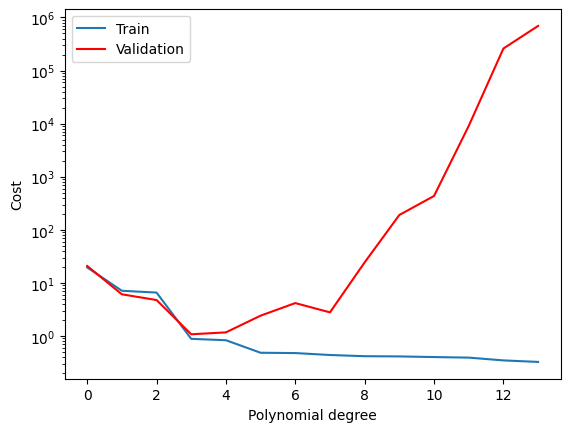

In [8]:
ax = plt.subplot()
ax.plot(degrees, train_error, label="Train")
ax.plot(degrees, val_error, "r", label="Validation")
ax.legend()
_ = ax.set(xlabel="Polynomial degree", ylabel="Cost", yscale="log")

Best performing are degree 3 and 4. Would that be also true for a third independent dataset?

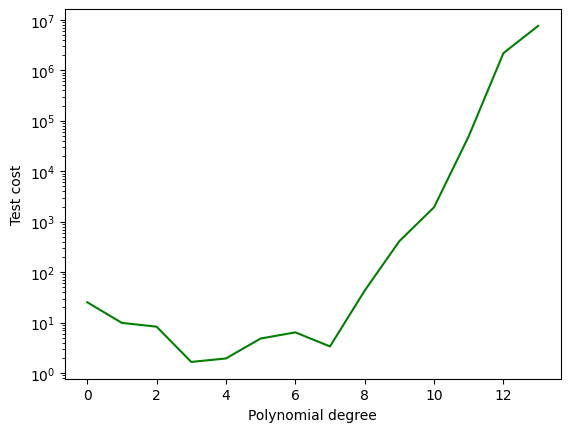

In [9]:
x_test, y_test = generate_data()
test_error = []
for degree, model in zip(degrees, models):
    X_test = PolynomialFeatures(degree).fit_transform(x_test[:, np.newaxis])
    test_error.append(mean_squared_error(y_test, model.predict(X_test)))
ax = plt.subplot()
ax.plot(degrees, test_error, "g")
_ = ax.set(xlabel="Polynomial degree", yscale="log", ylabel="Test cost")

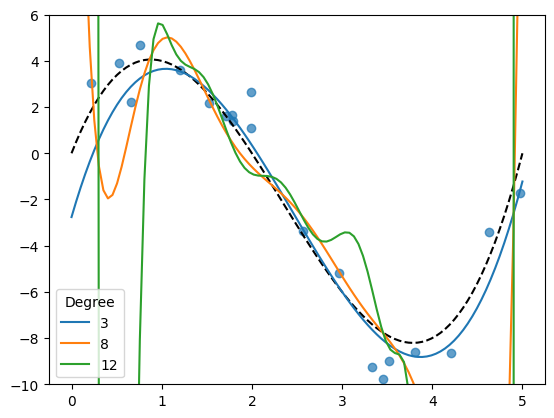

In [10]:
ax = plt.subplot()
ax.plot(x_plot, y_plot, "k--")
ax.scatter(x_test, y_test, alpha=0.7)
for degree in [3, 8, 12]:
    ax.plot(x_plot, y_plots[degree], label=f"{degree}")
ax.set(ylim=(-10, 6))
_ = ax.legend(loc="lower left", title="Degree")

It looks about right. In machine learning, we use three datasets. A training dataset to train, a validation dataset to select hyperparameters (e.g. degree), and a test set to see how well our model works.

Exercise: Please, use another mystery polynomial and find the polynomial that best approximates the data following the machine learning pipeline (train, validate and test)